NGUYỄN TRỌNG HUY - MSSV 51900507
PHẠM TRƯỜNG GIANG - MSSV 51900793

In [192]:
import accuracy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
df = pd.read_csv('seattleWeather_1948-2017.csv')

In [194]:
df["DATE"] = pd.to_datetime(df["DATE"], errors='coerce')

In [195]:
df = df.apply(pd.to_numeric, errors='ignore')

In [196]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,-694310400000000000,0.47,51,42,1.0
1,-694224000000000000,0.59,45,36,1.0
2,-694137600000000000,0.42,45,35,1.0
3,-694051200000000000,0.31,45,34,1.0
4,-693964800000000000,0.17,45,32,1.0


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  int64  
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 998.2 KB


In [198]:

df.describe()

,DATE,PRCP,TMAX,TMIN,RAIN
count,2.555100e+04,25548.000000,25551.000000,25551.000000,25548.000000
mean,4.094496e+17,0.106222,59.544206,44.514226,0.426648
std,6.372935e+17,0.239031,12.772984,8.892836,0.494600
min,-6.943104e+17,0.000000,4.000000,0.000000,0.000000
25%,-1.424304e+17,0.000000,50.000000,38.000000,0.000000
50%,4.094496e+17,0.000000,58.000000,45.000000,0.000000
75%,9.613296e+17,0.100000,69.000000,52.000000,1.000000
max,1.513210e+18,5.020000,103.000000,71.000000,1.000000


In [199]:
# Kiểm tra giá trị thiếu
print(df.isnull().sum())

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64


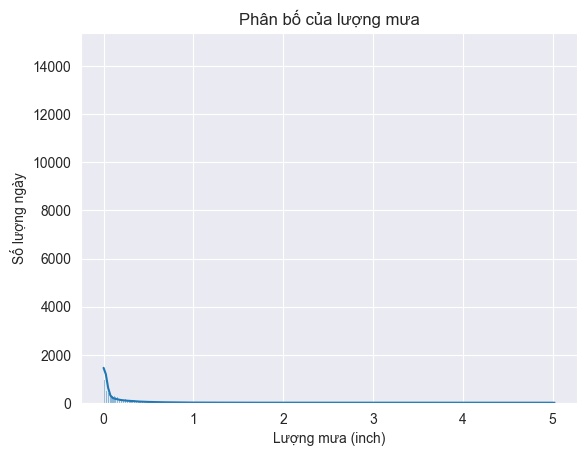

In [200]:
sns.histplot(df["PRCP"], kde=True)
plt.xlabel("Lượng mưa (inch)")
plt.ylabel("Số lượng ngày")
plt.title("Phân bố của lượng mưa")
plt.show()

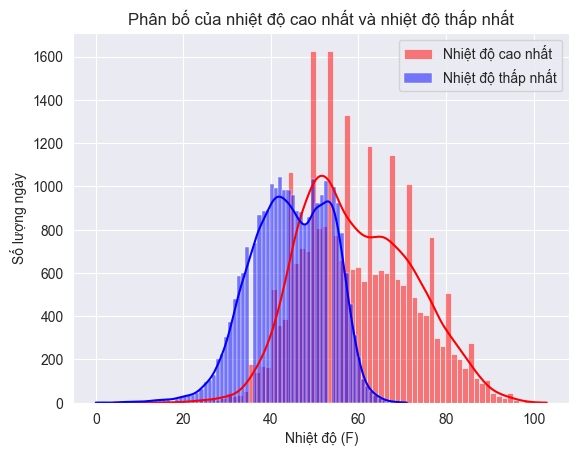

In [201]:
# Xem phân bố của nhiệt độ cao nhất và nhiệt độ thấp nhất
sns.histplot(df["TMAX"], kde=True, color="red", label="Nhiệt độ cao nhất")
sns.histplot(df["TMIN"], kde=True, color="blue", label="Nhiệt độ thấp nhất")
plt.xlabel("Nhiệt độ (F)")
plt.ylabel("Số lượng ngày")
plt.title("Phân bố của nhiệt độ cao nhất và nhiệt độ thấp nhất")
plt.legend()
plt.show()

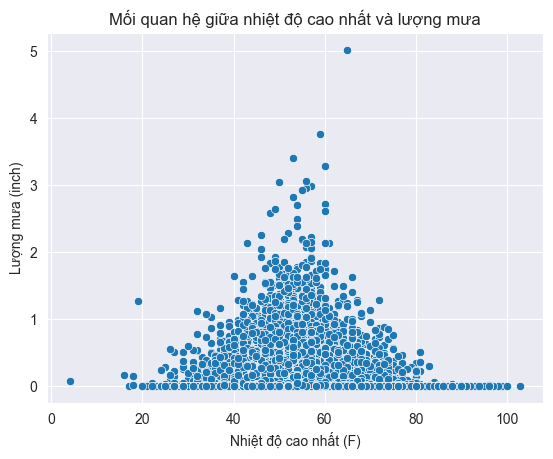

In [202]:
# Xem mối quan hệ giữa nhiệt độ cao nhất và lượng mưa
sns.scatterplot(x="TMAX", y="PRCP", data=df)
plt.xlabel("Nhiệt độ cao nhất (F)")
plt.ylabel("Lượng mưa (inch)")
plt.title("Mối quan hệ giữa nhiệt độ cao nhất và lượng mưa")
plt.show()

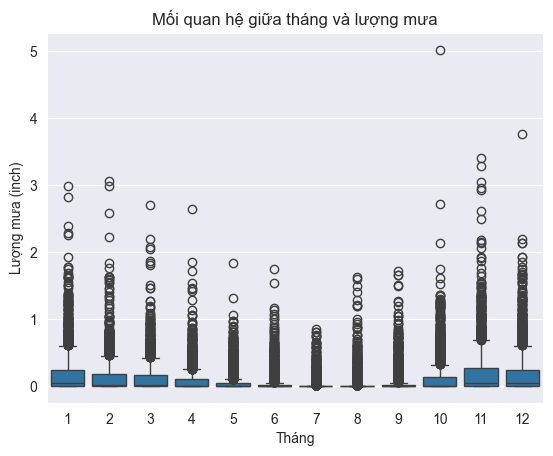

In [203]:
# Xem mối quan hệ giữa tháng và lượng mưa
df["MONTH"] = pd.to_datetime(df["DATE"]).dt.month #tạo cột mới là tháng từ cột ngày
sns.boxplot(x="MONTH", y="PRCP", data=df)
plt.xlabel("Tháng")
plt.ylabel("Lượng mưa (inch)")
plt.title("Mối quan hệ giữa tháng và lượng mưa")
plt.show()

Xây dựng mô hình hồi quy tuyến tính để dự đoán lượng mưa dựa trên nhiệt độ cao nhất

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [205]:
from sklearn.model_selection import train_test_split

df = df.dropna(subset=['PRCP'])
X = df["TMAX"].values.reshape(-1, 1)
y = df["PRCP"].dropna().values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
# Huấn luyện mô hình
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [207]:
# Dự đoán và đánh giá mô hình
y_pred = linear_model.predict(X_test)
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
r2 = linear_model.score(X_test, y_test)
print("\nLinear Regression Model Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 0.05188079856317337
Root Mean Squared Error (RMSE): 0.22777356862281753
R^2 Score: 0.052703397090726356


Ensemble Learing

In [208]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RAIN'] = le.fit_transform(df['RAIN'])
X = df.drop('RAIN', axis=1)
y = df['RAIN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [209]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [210]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [211]:
# In kết quả
print('Accuracy:', accuracy)
print('Confusion matrix:\n', conf_matrix)
print('Classification report:\n', class_report)

Accuracy: 1.0
Confusion matrix:
 [[2953    0]
 [   0 2157]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2953
           1       1.00      1.00      1.00      2157

    accuracy                           1.00      5110
   macro avg       1.00      1.00      1.00      5110
weighted avg       1.00      1.00      1.00      5110


Sử dụng Feed Forward Neural Network và Reccurent Neural Network

In [212]:
# Xử lý dữ liệu (sử dụng một phần của dữ liệu để minh họa)
df = df[['DATE', 'TMAX', 'PRCP']]
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df = df.dropna(subset=['DATE', 'TMAX', 'PRCP'])
df = df.set_index('DATE')

In [213]:
# Tạo đặc trưng thời gian cho RNN
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

In [214]:
# Chuyển đổi cột 'PRCP' thành số (1: Rain, 0: No Rain)
df['PRCP'] = np.where(df['PRCP'] > 0, 1, 0)

In [215]:
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df[['TMAX', 'Year', 'Month', 'Day']]
y = df['PRCP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)